**Muzaffer Estelik**

**GTID :** 903473214

estelik.muzaffer@gatech.edu

**Supervised Learning**

**Sloan Digital Sky Survey DR14**

**source : https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey**

### INTRODUCTION

The purpose of this project is to explore some techniques in supervised learning. It is important to realize that understanding an algorithm or technique requires understanding how it behaves under a variety of circumstances. As such, you will be asked to "implement" some simple learning algorithms (for sufficiently small values of implement, meaning I don't really want you to implement anything at all), and to compare their performance.

The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

I'll be implementing five learning algorithms. They are:
* Decision trees with some form of pruning
* Neural networks
* Boosting
* Support Vector Machines
* k-nearest neighbors

In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.decomposition import PCA
from sklearn.model_selection import ShuffleSplit
%matplotlib inline


In [3]:
data=pd.read_csv('Skyserver_SQL2_27_2018 6_51_39 PM.csv')

In [4]:
data.shape

(10000, 18)

In [4]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [5]:
data.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


It's good to have all my feature numeric. There's no need to make any encoding. But I'll definitely need scaling. Before that, I want to see the correlation between the features including the target.

In [7]:
data.corr()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To make it easier to understand, I'll plot it with a heat map.

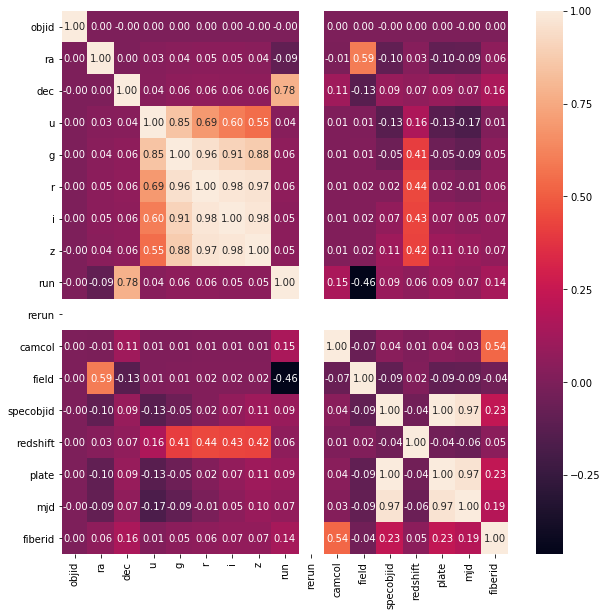

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.2f');

I need to eliminate some columns

In [5]:
data.drop(['specobjid','fiberid'],axis=1,inplace=True)

In [16]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922


In [6]:
mapping = {'STAR':1,'GALAXY':2,'QSO':3}
data.replace({'class':mapping},inplace=True)

In [18]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,1,-0.000009,3306,54922
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,1,-0.000055,323,51615
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,2,0.123111,287,52023
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,1,-0.000111,3306,54922
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,1,0.000590,3306,54922


In [8]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [9]:
# Splitting the target feature
X=data.drop('class',axis=1)
y=data['class']

In [21]:
y.value_counts()

2    4998
1    4152
3     850
Name: class, dtype: int64

In [10]:
#Splitting the data into train and test sets as 80% for train and the remaining 20% for test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [11]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (8000, 15)
y_train shape: (8000,)
X_test shape: (2000, 15)
y_test shape: (2000,)


### Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt_clf = DecisionTreeClassifier()

param_grid = {
                'max_depth': [3, 4, 5],
                'criterion': ['gini','entropy'],
                'splitter' : ['best','random'],
                'min_samples_split' : [2,3],
                'min_samples_leaf' :[1, 2],
                'min_weight_fraction_leaf' : [0.0,0.001],
                'max_features':[None, 'auto', 'sqrt', 'log2'],
                'min_impurity_decrease' : [0.0, 0.02]
                #'ccp_alpha' : [0.0, 0.001]
             }

#grid_search = GridSearchCV(dt_clf, param_grid, scoring = 'accuracy',cv=kFold, return_train_score=True, n_jobs=-1)

#grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 4, 5], 'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'min_samples_split': [2, 3], 'min_samples_leaf': [1, 2], 'min_weight_fraction_leaf': [0.0, 0.001], 'max_features': [None, 'auto', 'sqrt', 'log2'], 'min_impurity_decrease': [0.0, 0.02]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [28]:
#grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'splitter': 'best'}

In [42]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=None,
                                min_impurity_decrease= 0.0, min_samples_leaf= 1, min_samples_split= 2,
                                 min_weight_fraction_leaf= 0.0, splitter= 'best')

In [43]:
process_times = []
start_time = time.time()
dt_clf.fit(X_train, y_train)
end_time = time.time()
process_time = end_time - start_time
process_times.append(process_time)
print(f"Model trained in {process_time} seconds")

Model trained in 0.11200189590454102 seconds


In [44]:
y_pred_train = dt_clf.predict(X_train)
y_pred_test = dt_clf.predict(X_test)

In [45]:
dt_train_score = accuracy_score(y_train, y_pred_train)
dt_test_score = accuracy_score(y_test, y_pred_test)

In [35]:
print('Train Accuracy score: {}'
      .format(dt_train_score))
print('Test Accuracy score: {}'
      .format(dt_test_score))

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

Train Accuracy score: 0.9915
Test Accuracy score: 0.99
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       814
           2       0.99      0.99      0.99       996
           3       0.98      0.92      0.95       190

   micro avg       0.99      0.99      0.99      2000
   macro avg       0.99      0.97      0.98      2000
weighted avg       0.99      0.99      0.99      2000

[[814   0   0]
 [  1 991   4]
 [  0  15 175]]


In [36]:
dt_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.00107318, 0.00182095,
       0.        , 0.00160587, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.9955    , 0.        , 0.        ])

In [46]:
from sklearn import tree

In [102]:
def plot_validation_curve(estimator, title, X, y, param, param_range, cv=5,ylim=None, scoring="accuracy", list=None):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel(param)
    plt.ylabel("Accuracy Score")

    train_scores, valid_scores = validation_curve(estimator, X, y, param,param_range,cv = cv, scoring = scoring)
    train_scores_mean = train_scores.mean(axis = 1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = valid_scores.mean(axis = 1)
    test_scores_std = np.std(valid_scores, axis=1)
    plt.grid()
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(param_range, train_scores_mean, 'o-', color="r",
             label="Training Score")
    plt.plot(param_range, test_scores_mean, 'o-', color="g",
             label="Cross-validation Score")

    plt.legend(loc="best")
    plt.show()
    return [train_scores_mean,test_scores_mean ]

In [53]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=None,
                                min_impurity_decrease= 0.0, min_samples_leaf= 1, min_samples_split= 2,
                                 min_weight_fraction_leaf= 0.0, splitter= 'best')

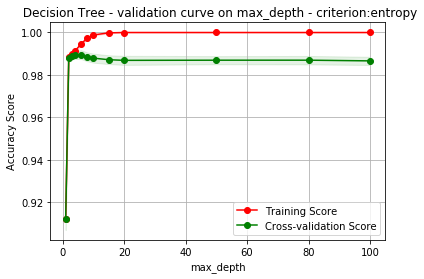

In [54]:
max_depths = [1, 2, 3, 4, 6, 8, 10, 15, 20]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

res_val = plot_validation_curve(dt_clf, ' Decision Tree - validation curve on max_depth - criterion:entropy', X,
                                    y, 'max_depth', max_depths, cv=cv)

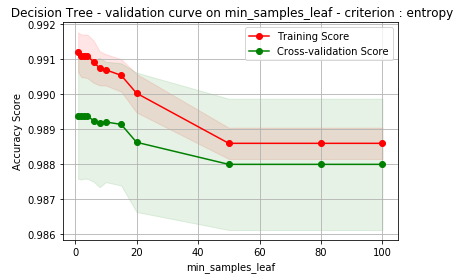

In [55]:
min_samples_leaf = [1, 2, 3, 4, 6, 8, 10, 15, 20, 50, 80, 100]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(dt_clf, ' Decision Tree - validation curve on min_samples_leaf - criterion : entropy', X,
                                    y, 'min_samples_leaf', min_samples_leaf, scoring=None, cv=cv)

In [56]:
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=4, max_features=None,
                                min_impurity_decrease= 0.0, min_samples_leaf= 1, min_samples_split= 2,
                                 min_weight_fraction_leaf= 0.0, splitter= 'best')

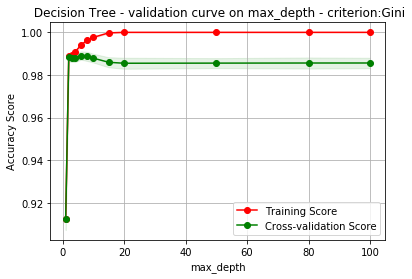

In [57]:
max_depths = [1, 2, 3, 4, 6, 8, 10, 15, 20, 30]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(dt_clf, ' Decision Tree - validation curve on max_depth - criterion:Gini', X,
                                    y, 'max_depth', max_depths, cv=cv)

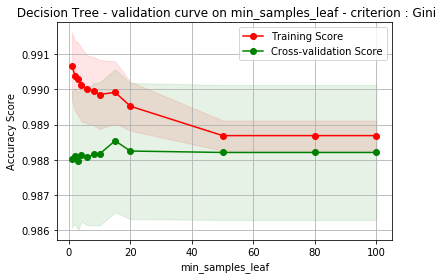

In [58]:
min_samples_leaf = [1, 2, 3, 4, 6, 8, 10, 15, 20, 50, 60]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(dt_clf, ' Decision Tree - validation curve on min_samples_leaf - criterion : Gini', X,
                                    y, 'min_samples_leaf', min_samples_leaf, scoring=None, cv=cv)

In [59]:
#grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'splitter': 'best'}

In [60]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=None,
                                min_impurity_decrease= 0.0, min_samples_leaf= 1, min_samples_split= 2,
                                 min_weight_fraction_leaf= 0.0, splitter= 'best')

### Boosting

In [47]:
from sklearn.ensemble import AdaBoostClassifier

In [48]:
adaboost_clf = AdaBoostClassifier(base_estimator = dt_clf)

In [70]:
param_grid = {
                'n_estimators': [45,50,55],
                'learning_rate': [0.22,0.23,0.24],
                'algorithm' : ['SAMME','SAMME.R'],
             }

#grid_search = GridSearchCV(adaboost_clf, param_grid, scoring = 'accuracy',cv=kFold, return_train_score=True, n_jobs=-1)

#grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [45, 50, 55], 'learning_rate': [0.22, 0.23, 0.24], 'algorithm': ['SAMME', 'SAMME.R']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [71]:
#grid_search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.23, 'n_estimators': 50}

In [49]:
adaboost_clf = AdaBoostClassifier(base_estimator = dt_clf, algorithm='SAMME', learning_rate=0.23, n_estimators=50)

In [50]:
start_time = time.time()
adaboost_clf.fit(X_train, y_train)
end_time = time.time()
process_time = end_time - start_time
process_times.append(process_time)
print(f"Model Trained in {process_time} seconds")

Model Trained in 3.424016237258911 seconds


In [51]:
y_pred_train = adaboost_clf.predict(X_train)
y_pred_test = adaboost_clf.predict(X_test)

In [52]:
adaboost_train_score = accuracy_score(y_train, y_pred_train)
adaboost_test_score = accuracy_score(y_test, y_pred_test)

In [77]:
print('Train Accuracy score: {}'
      .format(adaboost_train_score))
print('Test Accuracy score: {}'
      .format(adaboost_test_score))

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

Train Accuracy score: 0.995125
Test Accuracy score: 0.9925
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       814
           2       0.99      0.99      0.99       996
           3       0.97      0.95      0.96       190

   micro avg       0.99      0.99      0.99      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000

[[813   0   1]
 [  1 991   4]
 [  0   9 181]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\l

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

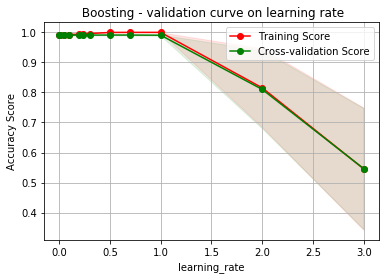

In [78]:
learning_rates = [0.001,0.01,0.05,0.1,0.2,0.23,0.3,0.5,0.7,1,2,3]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(adaboost_clf, ' Boosting - validation curve on learning rate', X,
                                    y, 'learning_rate', learning_rates, cv=cv)

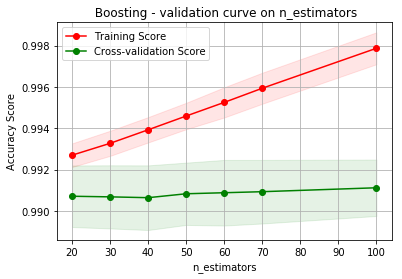

In [88]:
n_estimators = [20,30,40,50,60,70,100]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(adaboost_clf, ' Boosting - validation curve on n_estimators', X,
                                    y, 'n_estimators', n_estimators, cv=cv)

### Support Vector Machines

In [53]:
from sklearn.svm import LinearSVC, SVC
import time

In [90]:
LSVC_clf = LinearSVC()

In [ ]:
#param_grid = {
#                #'penalty': ['l1','l2'],
#                #'loss' : ['hinge','squared_hinge'],
#                'dual':[True, False],
#                #'tol':[0.0008,0.001,0.0015,0.002],
#                #'C': [0.001,0.005,0.008,0.01,0.15,0.02],
#                'fit_intercept': [True, False]
#              }

In [ ]:
#grid_search = GridSearchCV(LSVC_clf, param_grid, scoring = 'accuracy',cv=kFold, return_train_score=True)
#grid_search.fit(X_train,y_train)

In [ ]:
#grid_search.best_params_

In [54]:
LSVC_clf = LinearSVC(penalty='l1', C=0.1, loss='squared_hinge', dual=False, fit_intercept=True)

In [55]:
start_time = time.time()
LSVC_clf.fit(X_train, y_train)
end_time = time.time()
dt_time = end_time - start_time
print(f"Model process time: {dt_time}")
process_times.append(dt_time)

Model process time: 0.7237644195556641


In [56]:
y_pred_train = LSVC_clf.predict(X_train)
y_pred_test = LSVC_clf.predict(X_test)

In [57]:
LSVC_train_score = accuracy_score(y_train, y_pred_train)
LSVC_test_score = accuracy_score(y_test, y_pred_test)

In [274]:
print('Train score: {}'
      .format(LSVC_train_score))
print('Test score: {}'
      .format(LSVC_test_score))

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

Train score: 0.971375
Test score: 0.976
              precision    recall  f1-score   support

           1       0.98      0.99      0.98       814
           2       0.98      0.97      0.98       996
           3       0.97      0.92      0.94       190

   micro avg       0.98      0.98      0.98      2000
   macro avg       0.97      0.96      0.97      2000
weighted avg       0.98      0.98      0.98      2000

[[807   7   0]
 [ 19 971   6]
 [  0  16 174]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


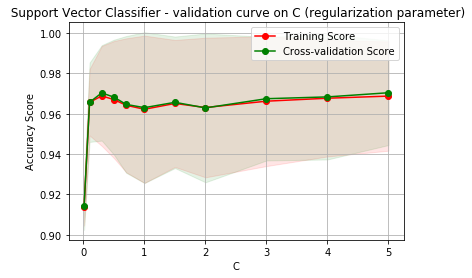

In [170]:
C = [0.01,0.1,0.3,0.5,0.7,1,1.5,2,3,4,5]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(LSVC_clf, ' Support Vector Classifier - validation curve on C (regularization parameter)', X,
                                    y, 'C', C, cv=cv)

In [171]:
LSVC_clf = LinearSVC(loss='squared_hinge', dual=False, fit_intercept=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

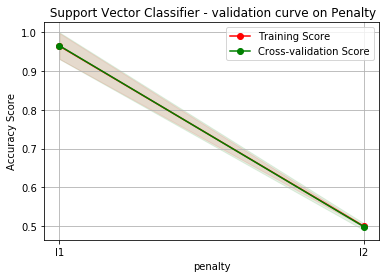

In [172]:
penalty=['l1','l2']

# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(LSVC_clf, ' Support Vector Classifier - validation curve on Penalty', X,
                                    y, 'penalty', penalty, cv=cv)

### Kernelized SVC

In [58]:
KSVC_clf = SVC()

In [92]:
param_grid = {
                #'kernel': ['rbf','poly','sigmoid'],
                #'kernel': ['rbf','sigmoid'],
                'kernel': ['sigmoid'],
                'degree':[0.0001,0.0005,0.0008],
                'gamma' : ['scale','auto'],
                'C': [1.4,1.45,1.50],
                'shrinking':[True,False],
                'tol':[0.011,0.015,0.016]
              }

In [176]:
#grid_search = GridSearchCV(KSVC_clf, param_grid, scoring = 'accuracy',cv=kFold, return_train_score=True)
#grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['sigmoid'], 'degree': [0.0001, 0.0005, 0.0008], 'gamma': ['scale', 'auto'], 'C': [1.4, 1.45, 1.5], 'shrinking': [True, False], 'tol': [0.011, 0.015, 0.016]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [177]:
#grid_search.best_params_

{'C': 1.4,
 'degree': 0.0001,
 'gamma': 'scale',
 'kernel': 'sigmoid',
 'shrinking': True,
 'tol': 0.011}

In [59]:
KSVC_clf = SVC(C=1.4, gamma='scale',kernel='sigmoid',shrinking=True,tol=0.011)

In [60]:
start_time = time.time()
KSVC_clf.fit(X_train, y_train)
end_time = time.time()
dt_time = end_time - start_time
print(f"Model process time: {dt_time}")
process_times.append(dt_time)

Model process time: 3.5460011959075928


In [61]:
y_pred_train = KSVC_clf.predict(X_train)
y_pred_test = KSVC_clf.predict(X_test)

In [62]:
KSVC_train_score = accuracy_score(y_train, y_pred_train)
KSVC_test_score = accuracy_score(y_test, y_pred_test)

In [197]:
print('Train score: {}'
      .format(KSVC_train_score))
print('Test score: {}'
      .format(KSVC_test_score))

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

Train score: 0.50025
Test score: 0.498
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       814
           2       0.50      1.00      0.66       996
           3       0.00      0.00      0.00       190

   micro avg       0.50      0.50      0.50      2000
   macro avg       0.17      0.33      0.22      2000
weighted avg       0.25      0.50      0.33      2000

[[  0 814   0]
 [  0 996   0]
 [  0 190   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


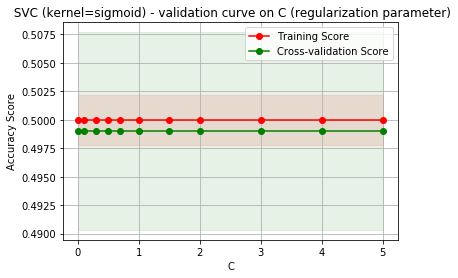

In [199]:
C = [0.01,0.1,0.3,0.5,0.7,1,1.5,2,3,4,5]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(KSVC_clf, ' SVC (kernel=sigmoid) - validation curve on C (regularization parameter)', X,
                                    y, 'C', C, cv=cv)

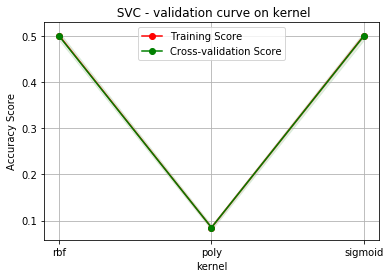

In [200]:
kernel=['rbf','poly','sigmoid']
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(KSVC_clf, ' SVC - validation curve on kernel', X,
                                    y, 'kernel', kernel, cv=cv)

In [83]:
pca = PCA(n_components=5, svd_solver='auto')
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_comb_pca = np.concatenate((X_train_pca, X_test_pca), axis=0)

In [93]:
#grid_search = GridSearchCV(KSVC_clf, param_grid, scoring = 'accuracy',cv=kFold, return_train_score=True)
#grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.4, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='sigmoid', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.011, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.4, 1.45, 1.5],
                         'degree': [0.0001, 0.0005, 0.0008],
                         'gamma': ['scale', 'auto'], 'kernel': ['sigmoid'],
                         'shrinking': [True, False],
                         'tol': [0.011, 0.015, 0.016]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [95]:
#grid_search.best_params_

{'C': 1.4,
 'degree': 0.0001,
 'gamma': 'auto',
 'kernel': 'sigmoid',
 'shrinking': True,
 'tol': 0.011}

In [96]:
KSVC_clf = SVC(C=1.4, gamma='auto',degree=0.0001, kernel='sigmoid',shrinking=True,tol=0.011)

In [97]:
start_time = time.time()
KSVC_clf.fit(X_train_pca, y_train)
end_time = time.time()
dt_time = end_time - start_time
print(f"Model process time: {dt_time}")
#process_times.append(dt_time)

Model process time: 0.6480188369750977


In [98]:
y_pred_train = KSVC_clf.predict(X_train_pca)
y_pred_test = KSVC_clf.predict(X_test_pca)

In [99]:
KSVC_train_score_pca = accuracy_score(y_train, y_pred_train)
KSVC_test_score_pca = accuracy_score(y_test, y_pred_test)

In [100]:
print('Train score with PCA: {}'
      .format(KSVC_train_score_pca))
print('Test score with PCA: {}'
      .format(KSVC_test_score_pca))

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

Train score with PCA: 0.800875
Test score with PCA: 0.7815
              precision    recall  f1-score   support

           1       0.91      0.72      0.80       814
           2       0.72      0.98      0.83       996
           3       0.00      0.00      0.00       190

    accuracy                           0.78      2000
   macro avg       0.54      0.57      0.54      2000
weighted avg       0.73      0.78      0.74      2000

[[587 227   0]
 [ 20 976   0]
 [ 41 149   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


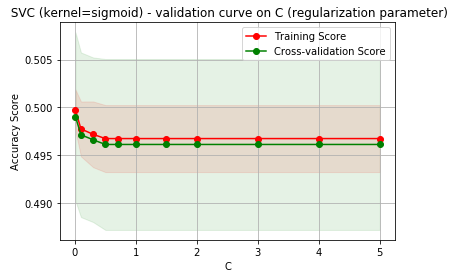

In [103]:
C = [0.01,0.1,0.3,0.5,0.7,1,1.5,2,3,4,5]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(KSVC_clf, ' SVC (kernel=sigmoid) - validation curve on C (regularization parameter)', X_comb_pca,
                                    y, 'C', C, cv=cv)

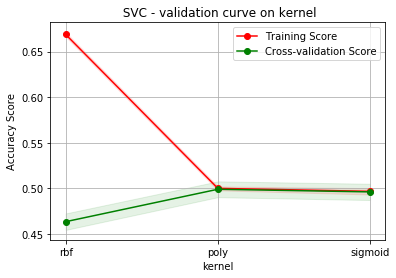

In [104]:
kernel=['rbf','poly','sigmoid']
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(KSVC_clf, ' SVC - validation curve on kernel', X_comb_pca,
                                    y, 'kernel', kernel, cv=cv)

### k-Nearest Neighbors

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [202]:
knn_clf = KNeighborsClassifier()

In [205]:
param_grid = {
                'n_neighbors' : [4,5,6],
                'weights' : ['uniform', 'distance'],
                'algorithm': ['ball_tree','kd_tree','brute'],
                'leaf_size':[1,2,3]    
            }

In [206]:
#grid_search = GridSearchCV (knn_clf, param_grid, cv=kFold,scoring = 'accuracy', return_train_score=True, n_jobs=-1)

In [207]:
#grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [4, 5, 6], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'leaf_size': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [208]:
#grid_search.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_neighbors': 6,
 'weights': 'distance'}

In [19]:
knn_clf = KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=6,n_jobs=-1,weights='distance')

In [278]:
start_time = time.time()
knn_clf.fit(X_train,y_train)
end_time = time.time()
knn_time = end_time - start_time
print(f"Model process time: {knn_time}")
#process_times.append(knn_time)

Model process time: 0.024006366729736328


In [212]:
y_pred_train = knn_clf.predict(X_train)
y_pred_test = knn_clf.predict(X_test)

In [214]:
knn_train_score = accuracy_score(y_train, y_pred_train)
knn_test_score = accuracy_score(y_test, y_pred_test)

In [215]:
print('Train score: {}'
      .format(knn_train_score))
print('Test  score: {}'
      .format(knn_test_score))

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

Train score: 1.0
Test Recall score: 0.8025
              precision    recall  f1-score   support

           1       0.86      0.76      0.81       814
           2       0.77      0.94      0.85       996
           3       0.77      0.26      0.39       190

   micro avg       0.80      0.80      0.80      2000
   macro avg       0.80      0.65      0.68      2000
weighted avg       0.81      0.80      0.79      2000

[[620 183  11]
 [ 56 936   4]
 [ 44  97  49]]


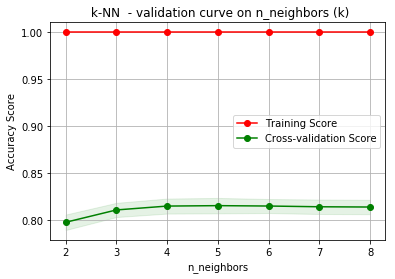

In [216]:
n_neighbors = [2,3,4,5,6,7,8]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(knn_clf, ' k-NN  - validation curve on n_neighbors (k)', X,
                                    y, 'n_neighbors', n_neighbors, cv=cv)

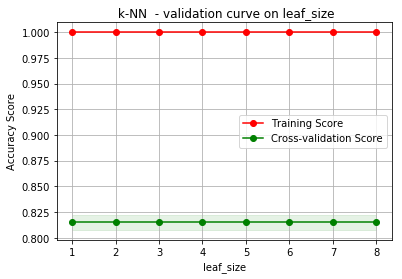

In [217]:
leaf_size = [1,2,3,4,5,6,7,8]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(knn_clf, ' k-NN  - validation curve on leaf_size', X,
                                    y, 'leaf_size', leaf_size, cv=cv)

In [15]:
X_train.shape

(8000, 15)

In [29]:
pca = PCA(n_components=5, svd_solver='auto')
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_comb_pca = np.concatenate((X_train_pca, X_test_pca), axis=0)

In [30]:
X_train_pca.shape

(8000, 5)

In [31]:
param_grid = {
                'n_neighbors' : [4,5,6],
                'weights' : ['uniform', 'distance'],
                'algorithm': ['ball_tree','kd_tree','brute'],
                'leaf_size':[1,2,3]    
            }

In [32]:
#grid_search = GridSearchCV (knn_clf, param_grid, cv=kFold,scoring = 'accuracy', return_train_score=True, n_jobs=-1)

In [33]:
#grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='ball_tree', leaf_size=1,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=6, p=2,
                                            weights='distance'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3], 'n_neighbors': [4, 5, 6],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [34]:
#grid_search.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_neighbors': 6,
 'weights': 'uniform'}

In [64]:
knn_clf = KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=6,n_jobs=-1,weights='uniform')

In [66]:
start_time = time.time()
knn_clf.fit(X_train_pca,y_train)
end_time = time.time()
knn_time = end_time - start_time
print(f"Model process time: {knn_time}")
process_times.append(knn_time)

Model process time: 0.017996788024902344


In [67]:
y_pred_train = knn_clf.predict(X_train_pca)
y_pred_test = knn_clf.predict(X_test_pca)

In [69]:
knn_train_score_pca = accuracy_score(y_train, y_pred_train)
knn_test_score_pca = accuracy_score(y_test, y_pred_test)

In [70]:
print('Train score: {}'
      .format(knn_train_score_pca))
print('Test  score: {}'
      .format(knn_test_score_pca))

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

Train score: 0.821875
Test  score: 0.7755
              precision    recall  f1-score   support

           1       0.83      0.77      0.80       814
           2       0.74      0.92      0.82       996
           3       0.46      0.03      0.06       190

    accuracy                           0.78      2000
   macro avg       0.68      0.57      0.56      2000
weighted avg       0.75      0.78      0.74      2000

[[627 184   3]
 [ 74 918   4]
 [ 51 133   6]]


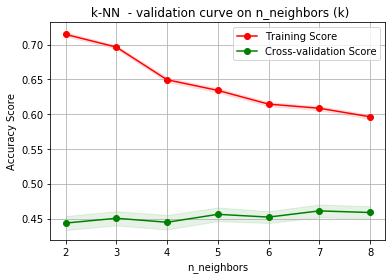

In [106]:
n_neighbors = [2,3,4,5,6,7,8]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(knn_clf, ' k-NN  - validation curve on n_neighbors (k)', X_comb_pca,
                                    y, 'n_neighbors', n_neighbors, cv=cv)

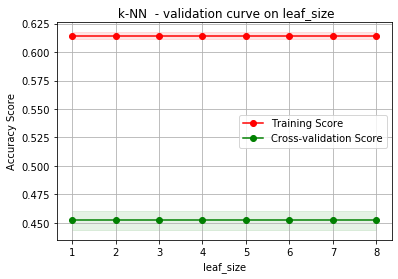

In [107]:
leaf_size = [1,2,3,4,5,6,7,8]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(knn_clf, ' k-NN  - validation curve on leaf_size', X_comb_pca,
                                    y, 'leaf_size', leaf_size, cv=cv)

### Neural Networks

In [71]:
from sklearn.neural_network import MLPClassifier

In [72]:
d = X_train.shape[1]

In [220]:
param_grid = {'hidden_layer_sizes'  : [(8,), (16,), (32,), (64,),(100,),(128,)],
              'activation': ['relu', 'logistic','identity','tanh'],
              'solver':['lbfgs','sgd','adam'],
              'alpha': [0.005, 0.001,0.0001],
              'learning_rate':['constant','invscaling','adaptive'],
              'learning_rate_init': sorted([(2**x)/500.0 for x in range(4)]+[0.000001])              
             }


In [73]:
nnclf = MLPClassifier(max_iter=500, early_stopping=True)

In [222]:
#grid_search = GridSearchCV(nnclf, param_grid, cv=kFold,scoring = 'accuracy', return_train_score=True, n_jobs=-1)

In [223]:
#grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(8,), (16,), (32,), (64,), (100,), (128,)], 'activation': ['relu', 'logistic', 'identity', 'tanh'], 'solver': ['lbfgs', 'sgd', 'adam'], 'alpha': [0.005, 0.001, 0.0001], 'learning_rate': ['constant', 'invscaling', 'adaptive'], 'learning_rate_init': [1e-06, 0.002, 0.004, 0.008, 0.016]},
       pre_dispatch='2*n_jobs', re

In [224]:
#grid_search.best_params_

{'activation': 'relu',
 'alpha': 0.005,
 'hidden_layer_sizes': (8,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.002,
 'solver': 'sgd'}

In [108]:
nnclf = MLPClassifier(max_iter=500, activation='relu', alpha=0.005, hidden_layer_sizes=(128,), learning_rate='constant',
                      learning_rate_init=0.002, solver='adam', early_stopping=True)

In [ ]:
start_time = time.time()
nnclf.fit(X_train,y_train)
end_time = time.time()
nntime = end_time - start_time
print(f"Model process time: {nntime}")
process_times.append(nntime)

In [76]:
y_pred_train = nnclf.predict(X_train)
y_pred_test = nnclf.predict(X_test)

In [77]:
nn_train_score = accuracy_score(y_train, y_pred_train)
nn_test_score = accuracy_score(y_test, y_pred_test)

In [78]:
print('Train score: {}'
      .format(nn_train_score))
print('Test  score: {}'
      .format(nn_test_score))

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

Train score: 0.50025
Test  score: 0.498
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       814
           2       0.50      1.00      0.66       996
           3       0.00      0.00      0.00       190

    accuracy                           0.50      2000
   macro avg       0.17      0.33      0.22      2000
weighted avg       0.25      0.50      0.33      2000

[[  0 814   0]
 [  0 996   0]
 [  0 190   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
start_time = time.time()
nnclf.fit(X_train_pca,y_train)
end_time = time.time()
nntime = end_time - start_time
print(f"Model process time: {nntime}")
#process_times.append(nntime)

Model process time: 1.5339999198913574


In [110]:
y_pred_train = nnclf.predict(X_train_pca)
y_pred_test = nnclf.predict(X_test_pca)

In [111]:
nn_train_score_pca = accuracy_score(y_train, y_pred_train)
nn_test_score_pca = accuracy_score(y_test, y_pred_test)

In [112]:
print('Train score with PCA: {}'
      .format(nn_train_score))
print('Test  score with PCA: {}'
      .format(nn_test_score))

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

Train score with PCA: 0.797
Test  score with PCA: 0.776
              precision    recall  f1-score   support

           1       0.89      0.72      0.80       814
           2       0.72      0.97      0.83       996
           3       0.00      0.00      0.00       190

    accuracy                           0.78      2000
   macro avg       0.54      0.57      0.54      2000
weighted avg       0.72      0.78      0.74      2000

[[590 223   1]
 [ 26 970   0]
 [ 44 146   0]]


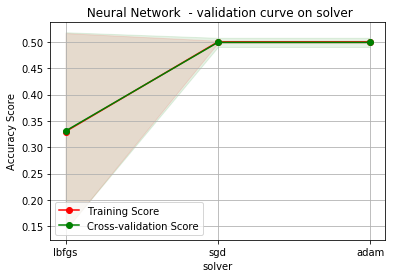

In [232]:
solver = ['lbfgs','sgd','adam']
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(nnclf, ' Neural Network  - validation curve on solver', X,
                                    y, 'solver', solver, cv=cv)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: invalid value encountered in subtra

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


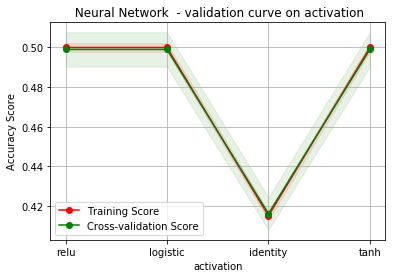

In [233]:
activation = ['relu', 'logistic','identity','tanh']
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(nnclf, ' Neural Network  - validation curve on activation', X,
                                    y, 'activation', activation, cv=cv)

### Comparison of the Models

In [117]:
models = ["Tree","Boosting","Linear-SVC","Kernelized SVC", "k-NN", "Neural Network"]

In [285]:
process_times_dict = dict(zip(models,process_times))

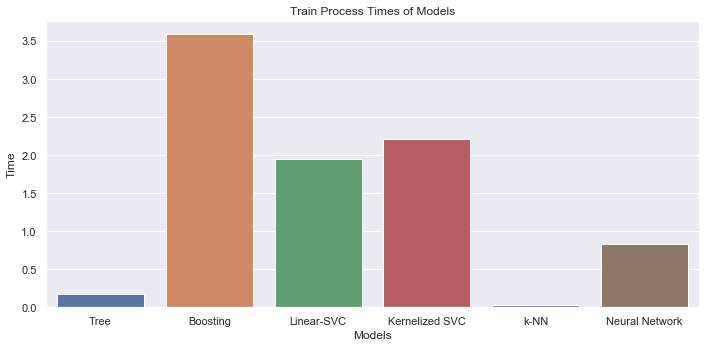

In [286]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.barplot(models, process_times)
plt.title("Train Process Times of Models")
plt.xlabel('Models')
plt.ylabel("Time");

In [287]:
process_times_dict

{'Tree': 0.17199492454528809,
 'Boosting': 3.5875322818756104,
 'Linear-SVC': 1.9479985237121582,
 'Kernelized SVC': 2.2060046195983887,
 'k-NN': 0.024006366729736328,
 'Neural Network': 0.8300042152404785}

In [115]:
train_scores = [dt_train_score, adaboost_train_score, LSVC_train_score, KSVC_train_score_pca, 
                       knn_train_score_pca, nn_train_score_pca]
test_scores = [dt_test_score, adaboost_test_score, LSVC_test_score, KSVC_test_score_pca, 
                      knn_test_score_pca, nn_test_score_pca]

In [118]:
for_plot = pd.DataFrame ([train_scores, test_scores], columns=models, index=['Train Accuracy Score', 'Test Accuracy Score'])
for_plot=for_plot.T

In [119]:
for_plot

,Train Accuracy Score,Test Accuracy Score
Tree,0.991500,0.9900
Boosting,0.995125,0.9925
Linear-SVC,0.971625,0.9750
Kernelized SVC,0.800875,0.7815
k-NN,0.821875,0.7755
Neural Network,0.799500,0.7800


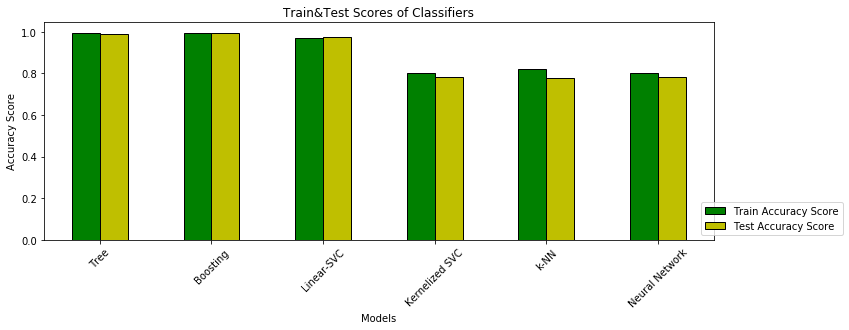

In [121]:
for_plot.plot(kind='bar', figsize=(12,4), color='gykc',  edgecolor='k')

plt.title('Train&Test Scores of Classifiers')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.legend(loc=4 , bbox_to_anchor=(1.2, 0))
plt.show();